# Lab 3: ggplot example

In [1]:
library(tidyverse)
options(repr.plot.height=4)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.0.6     ✔ dplyr   1.0.4
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [3]:
mil = read_csv("https://raw.githubusercontent.com/enesdilber/enesdilber.github.io/master/stats306_W2020/mil.csv")


── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_character()
)
ℹ Use `spec()` for the full column specifications.




In [ ]:
mil %>% print

# A tibble: 2,020 x 31
   age   state q1    q8a   q8b   q8c   q8d   q8e   q8f   q8g   q8h   q19   q20  
   <chr> <chr> <chr> <chr> <chr> <chr> <chr> <chr> <chr> <chr> <chr> <chr> <chr>
 1 28    NY    Very… Very… Very… Very… Very… Very… Not … Very… Very… No    <NA> 
 2 33    NE    Very… Not … One … One … Very… Very… Not … One … One … Yes   Abou…
 3 45    IN    Pret… Some… One … Some… One … Some… Not … Some… Very… Yes   Abou…
 4 66    IN    Very… Very… Very… Very… Very… Some… Not … Very… Very… No    <NA> 
 5 52    VA    Very… One … Very… Very… One … Some… Not … Very… Very… Yes   Ever…
 6 VOL … MD    Very… Some… One … One … Very… Some… Not … (VOL… Very… Yes   Abou…
 7 60    PA    Pret… Not … One … One … One … One … Not … One … One … No    <NA> 
 8 54    NC    Not … Very… Very… Very… One … Very… Not … Very… Very… <NA>  <NA> 
 9 48    FL    Pret… Some… One … One … One … Very… Not … Very… Very… Yes   Once…
10 48    MO    Pret… Some… Very… Very… One … Very… Not … One … Some… Yes   Once…
# … w

In [ ]:
mil %>% head

age,state,q1,q8a,q8b,q8c,q8d,q8e,q8f,q8g,...,q44g,q44i,q45a,q46,employ,lwp,finan,home2,educ,health
28,NY,Very happy,Very important but not the most,Very important but not the most,Very important but not the most,Very important but not the most,Very important but not the most,Not important,Very important but not the most,...,NA,NA,No,NA,Full-time,NA,No,Rent,"Some college, no 4-year degree (including associate degree)",Covered by health insurance
33,NE,Very happy,Not important,One of the most important things,One of the most important things,Very important but not the most,Very important but not the most,Not important,One of the most important things,...,NA,NA,Yes,1,Part-time,NA,No,NA,"Some college, no 4-year degree (including associate degree)",Covered by health insurance
45,IN,Pretty happy,Somewhat important,One of the most important things,Somewhat important,One of the most important things,Somewhat important,Not important,Somewhat important,...,Yes,No,No,NA,Not employed,Lived with current spouse before married,NA,NA,"College graduate (B.S., B.A., or other 4-year degree)",Covered by health insurance
66,IN,Very happy,Very important but not the most,Very important but not the most,Very important but not the most,Very important but not the most,Somewhat important,Not important,Very important but not the most,...,NA,NA,No,NA,Part-time,NA,NA,NA,High school incomplete (Grades 9-11),Covered by health insurance
52,VA,Very happy,One of the most important things,Very important but not the most,Very important but not the most,One of the most important things,Somewhat important,Not important,Very important but not the most,...,Yes,Yes,No,NA,Full-time,Lived with both current spouse and someone else,NA,NA,"College graduate (B.S., B.A., or other 4-year degree)",Covered by health insurance
VOL DON'T KNOW/REFUSED,MD,Very happy,Somewhat important,One of the most important things,One of the most important things,Very important but not the most,Somewhat important,Not important,(VOL) Don't know/Refused,...,NA,Yes,No,NA,Not employed,NA,NA,NA,"Some college, no 4-year degree (including associate degree)",Covered by health insurance


Each column of the data corresponds to one of the question asked during the survey. You can find the full script in this [folder](https://github.com/terhorst/stats306/tree/master/lectures/lecture02)

# Bar charts
Many of the columns here are of type factor, meaning they are categorical. To visualize their distribution, we can use a bar chart. Question 20 is:

    Q.20	How often do you visit the social networking site you use most often… several times a day, about once a day, every few days, once a week or less often?

## Exercise 1:
Using the `mil` table to reproduce this plot on social media usage among all respondents in the sample:


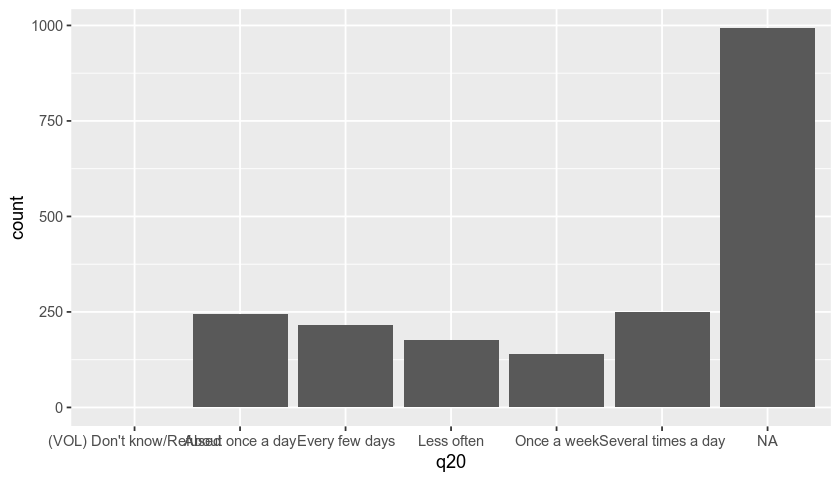

In [ ]:
ggplot(data = mil) + geom_bar(mapping = aes(x=q20))

This aesthetic looks different than what we have seen before. We didn't supply a `y` variable, and the `y` variable in the plot, **count**, is not even a variable in our data set. 

So we see that a **bar chart** differs quite fundamentally from a **scatter plot**. A scatter plot uses the raw data variables directly. A bar chart applies a **statistical transformation** (remember the difference between geom_bar and geom_col) (`stat_count` in our case) to create the counts and then plots the counts vs the raw variable (`cut` in our case).

How do we know that `geom_bar` uses `stat_count` as the default transformation? You can type `?geom_bar` in RStudio or consult the [online documentation](http://ggplot2.tidyverse.org/reference/geom_bar.html).

Geoemetries and statistical transformations comes in pairs. E.g.,

* `geom_point` and `"identity"`
* `geom_smooth` and `stat_smooth`
* `geom_bar` and `stat_count`

These are the defaults. Although it is usually unnecessary, they can be overridden.

## Exercise 2: 
Make x labels legible, hint: use `theme()` function and specify `axis.text.x`  

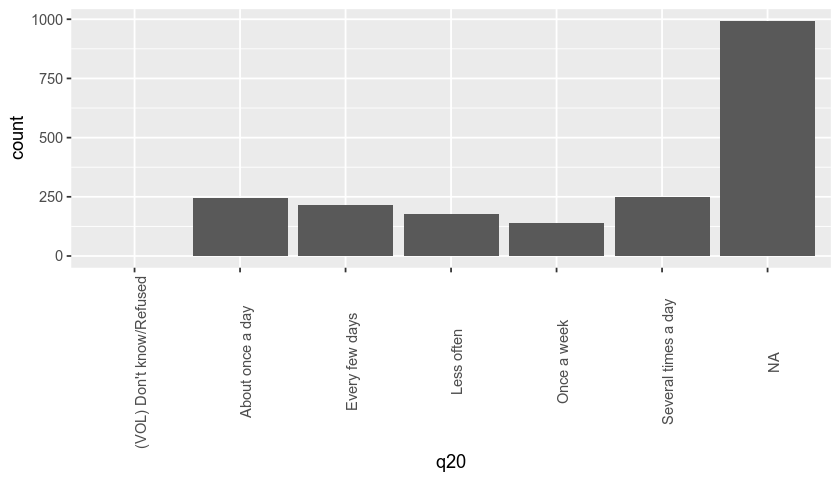

In [ ]:
ggplot(data = mil) + geom_bar(mapping = aes(x=q20))+ 
theme(axis.text.x = element_text(angle = 90))

## Exercise 3:
Instead of changing axis text, this time flip the plot.

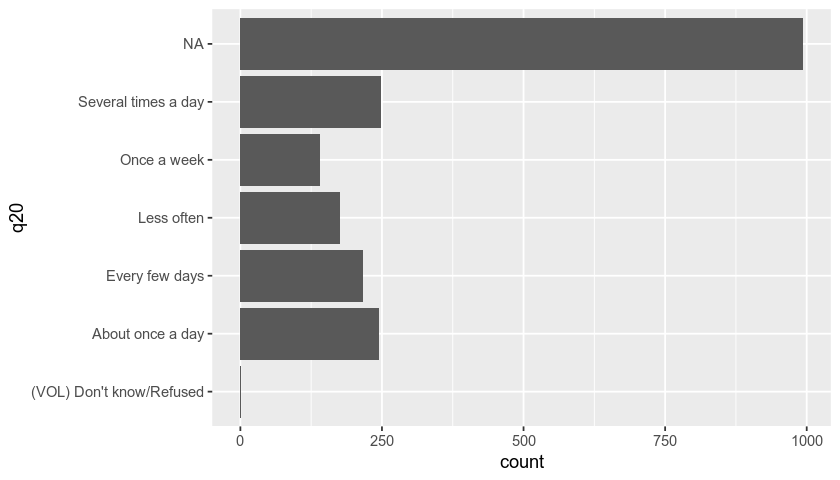

In [ ]:
ggplot(data = mil) + geom_bar(mapping = aes(x=q20)) + 
coord_flip()

## Exercise 4: 
Color the plot! hint: pass fill aesthetic.

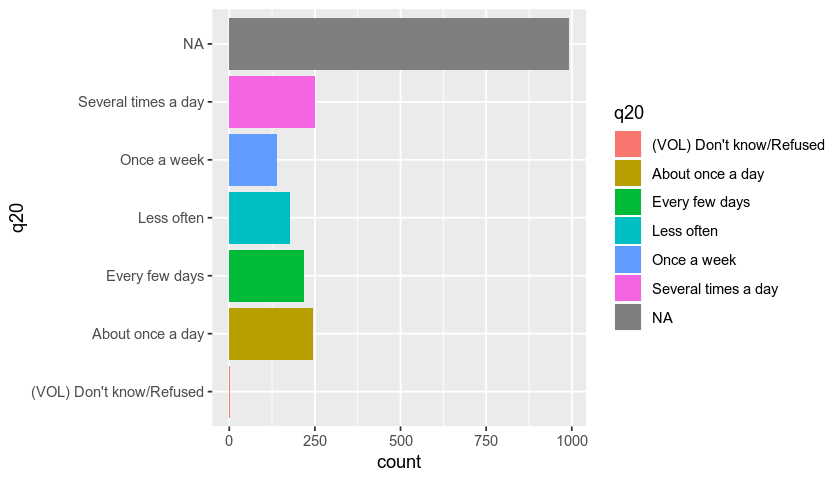

In [ ]:
ggplot(data = mil) + geom_bar(mapping = aes(x = q20, fill = q20)) + 
coord_flip()

## Exercise 5:
Fill each level of `q20` with employement information and set position argument to `fill`

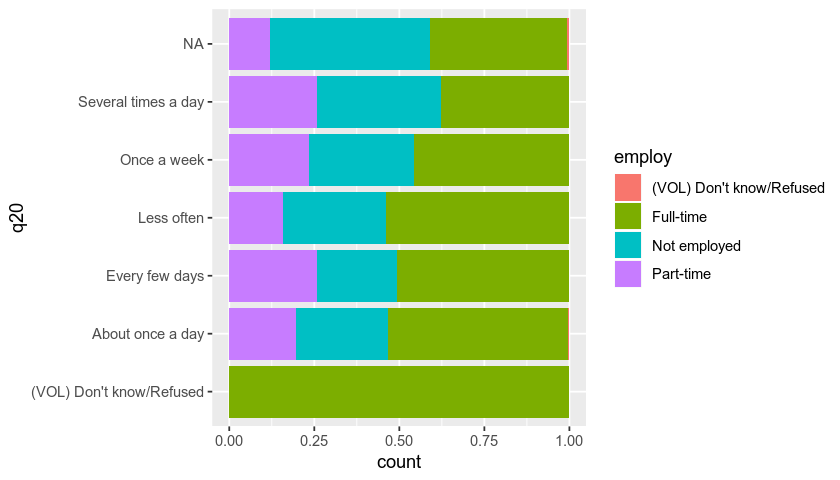

In [ ]:
ggplot(data = mil) +
    geom_bar(mapping = aes(x = q20, fill = employ), 
             position = "fill") + coord_flip()

# Facet

We already saw how to add a third variable to a scatter plot by using a color aesthetics. **Facets** provide another way to stratify plots by additional variables. Let's look at responses to:
    
    Q44i.	Have you ever placed your cell phone on or right next to your bed while sleeping?
    
    Q44b.	Do you have a close friend or family member who is gay? 
    
    AGE.    What is your age?


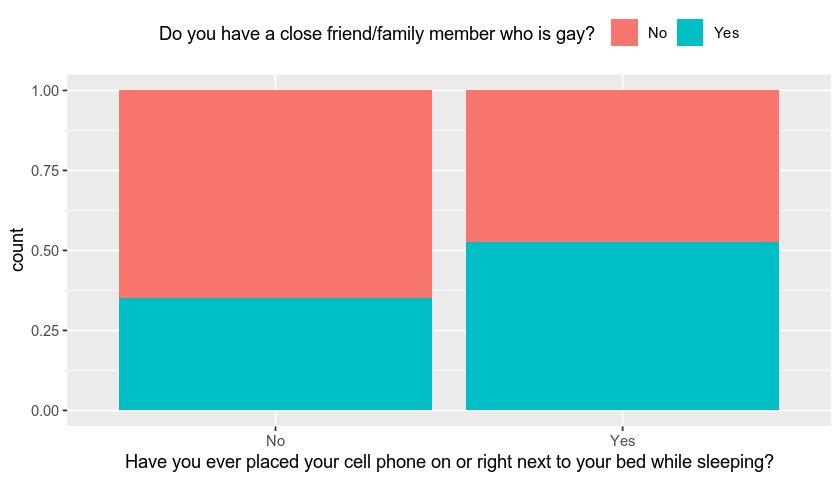

In [ ]:
# Lets filter out NA's and Refused answers

ggplot(filter(mil, q44b == "Yes" | q44b == "No", q44i == "Yes" | q44i == "No")) +
    geom_bar(mapping = aes(x = q44i, fill = q44b), 
             position = "fill") +
    xlab("Have you ever placed your cell phone on or right next to your bed while sleeping?")+
    scale_fill_discrete(name = "Do you have a close friend/family member who is gay?")+
    theme(legend.position = "top")


Q: Is there an association between those variables?
A: Not necessarily. Always remember correlation does not imply causation!

Let's add `age` variable to the plot

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”Warning message:
“Removed 26 rows containing non-finite values (stat_boxplot).”

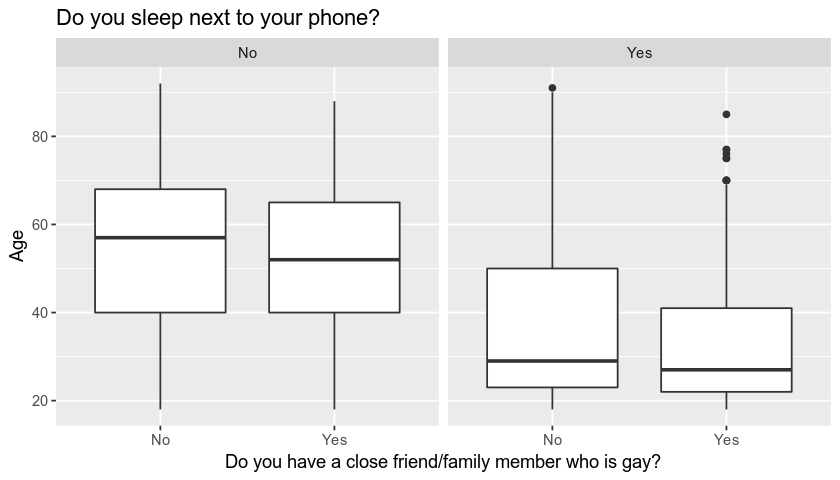

In [ ]:
ggplot(filter(mil, q44b == "Yes" | q44b == "No", q44i == "Yes" | q44i == "No")) + 
    geom_boxplot(aes(x=q44b, y=as.integer(as.character(age)))) + 
    facet_wrap(~ q44i) + 
    xlab("Do you have a close friend/family member who is gay?") + 
    ylab("Age") + 
    ggtitle("Do you sleep next to your phone?")

Big portion of variability can be explanied by `age` variable. It is called [Confounding](https://en.wikipedia.org/wiki/Confounding).

## Exercise 6:

Use `mpg` dataset. And create scater plot of `displ` vs `hwy`, use facet to stratify them for each level of `class`. And make sure your facets have only two rows. Add a linear line to each facet.

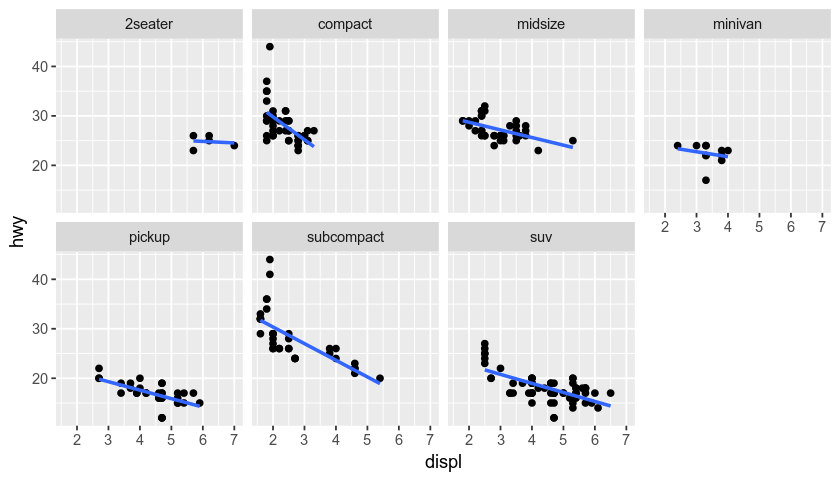

In [ ]:
ggplot(mpg, aes(x = displ, y = hwy))+geom_point() +
    facet_wrap(~class, nrow = 2) +
    geom_smooth(se = F,method = 'lm')